In [2]:
import pickle as pk
stash = list()
for model_name in ['mt5-xl', "xlm-roberta-xl"]:
    stash+=pk.load(open(f"{model_name}/category_identification_result.pk", "rb"))

### visualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.DataFrame(stash)

In [5]:
df = df.explode("scores")

In [6]:
import variables

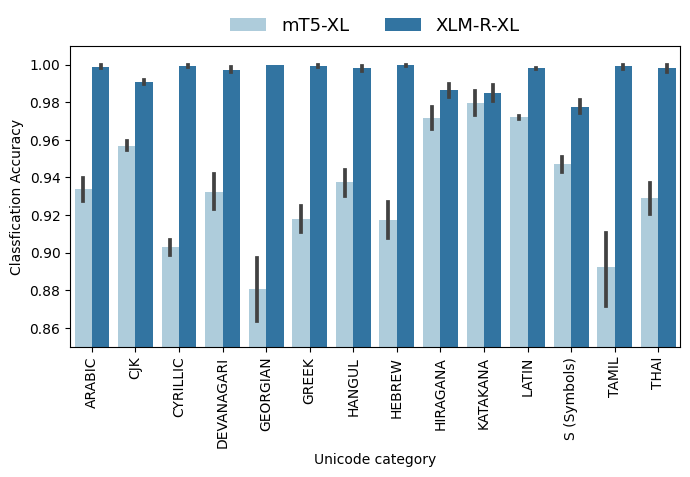

In [8]:
plt.figure(figsize=(7,5))
sns.set_palette("Paired")
plot_df = df[df['category'].isin(variables.CATEGORIES+["S"])].copy()
plot_df['model'] = plot_df['model'].map({"mt5-xl": "mT5-XL", "xlm-roberta-xl": "XLM-R-XL"})
plot_df["category"] = plot_df["category"].apply(lambda x: "S (Symbols)" if x == 'S' else x)
ax = sns.barplot(data=plot_df, 
                 x='category', y='scores', hue='model')
plt.xticks(rotation=90)
plt.ylim(0.85, 1.01)
ax.set_ylabel("Classfication Accuracy")
ax.set_xlabel("Unicode category")
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncols=2, frameon=False, fontsize=13)
plt.tight_layout()

plt.savefig("./figures/category-identification-task.png", dpi=400)